# Analisis Machine Learning: Clustering dan Klasifikasi pada Dataset Wine

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

- Mengimpor library NumPy untuk komputasi numerik.

- Mengimpor Matplotlib untuk visualisasi data.

- Mengimpor Pandas untuk manipulasi dan analisis data.

- Mengimpor algoritma K-Means dari scikit-learn untuk clustering.

In [2]:
dataset = pd.read_csv('wine-clustering.csv')
dataset.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Dataset "wine-clustering.csv" berisi data terkait karakteristik berbagai jenis wine, dengan fitur numerik yang merepresentasikan sifat fisikokimia (seperti pH, kadar alkohol, dan asam) serta kualitasnya. Dataset ini sering digunakan untuk menganalisis pola, mengelompokkan wine berdasarkan kesamaan karakteristik menggunakan teknik clustering seperti K-Means, dan mengevaluasi hasil pengelompokan untuk memberikan wawasan tentang hubungan antar fitur dalam wine.

In [3]:
X = dataset.iloc[:, [3, 4]].values

In [4]:
import warnings
warnings.filterwarnings('ignore')

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

Kode ini menggunakan Elbow Method untuk menentukan jumlah cluster optimal pada algoritma K-Means Clustering. Dengan menghitung WCSS (Within-Cluster Sum of Squares) untuk jumlah cluster 1 hingga 10, grafik WCSS nantinya akan menunjukkan "titik siku" (elbow point) di mana penurunan WCSS mulai melambat. Titik ini merepresentasikan jumlah cluster optimal yang memberikan keseimbangan antara variansi dalam cluster dan jumlah cluster. Parameter seperti k-means++ memastikan inisialisasi pusat cluster lebih efisien, sementara random_state menjamin hasil replikasi.

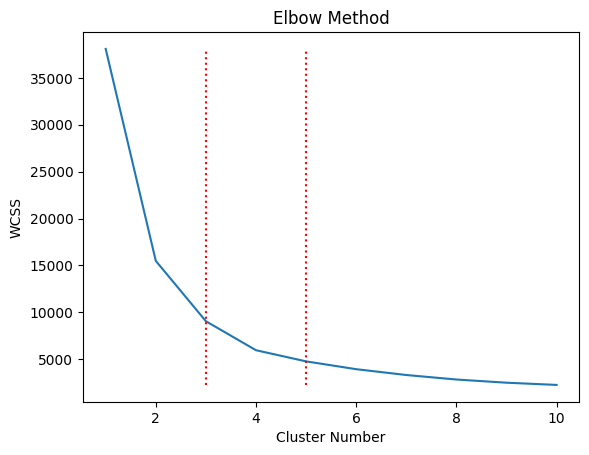

In [5]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Cluster Number')
plt.ylabel('WCSS')
plt.vlines(5, min(wcss), max(wcss), color='red', linestyle = 'dotted')
plt.vlines(3, min(wcss), max(wcss), color='red', linestyle = 'dotted')
plt.show()

1. Penurunan WCSS signifikan terjadi pada cluster 1 hingga 3.
2. Titik siku di cluster 3, menunjukkan jumlah cluster optimal.
3. Setelah cluster 3, penurunan WCSS melambat, menandakan tambahan cluster kurang efektif.

 Jumlah cluster optimal berdasarkan grafik adalah 3 cluster, karena memberikan keseimbangan terbaik antara variansi dalam cluster dan jumlah cluster.

In [6]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([4, 3, 3, 2, 4, 2, 3, 4, 3, 3, 2, 3, 1, 3, 3, 2, 4, 4, 2, 4, 4, 3,
       3, 3, 3, 4, 3, 3, 2, 3, 3, 2, 2, 0, 2, 3, 2, 3, 3, 4, 4, 1, 3, 2,
       2, 2, 3, 3, 2, 2, 3, 3, 2, 4, 4, 4, 4, 3, 2, 1, 3, 3, 3, 1, 2, 3,
       1, 1, 2, 0, 2, 1, 1, 0, 3, 3, 1, 2, 0, 3, 1, 1, 1, 1, 3, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 0, 0, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 3, 3,
       2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 3, 4, 3, 1, 1, 1, 1, 1, 1, 1, 4, 2,
       3, 2, 1, 3, 1, 3, 1, 3, 3, 1, 3, 3, 2, 3, 1, 1, 3, 2, 4, 2, 4, 3,
       2, 3, 1, 3, 3, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 3, 1, 1, 3, 3, 4,
       4, 3])

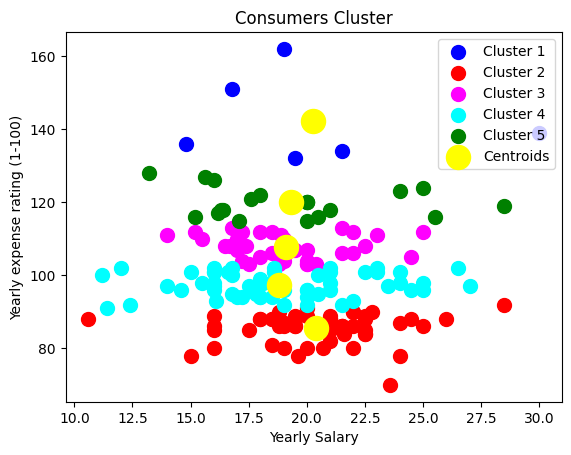

In [7]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'red', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'magenta', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'green', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Consumers Cluster')
plt.xlabel('Yearly Salary')
plt.ylabel('Yearly expense rating (1-100)')
plt.legend()

1. Dataset dikelompokkan menjadi 5 cluster berdasarkan Yearly Salary dan Yearly Expense Rating.
2. Setiap warna mewakili satu cluster, dengan titik kuning menunjukkan centroid (pusat cluster).
3. Cluster menunjukkan pola distribusi pengeluaran dan gaji tahunan konsumen untuk analisis segmentasi.

Hal ini menunjukkan pola segmentasi konsumen untuk analisis lebih lanjut


In [8]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
random_state = 42)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 0, 2, 2, 0,
       0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 2, 2, 2, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 2, 0, 1, 1, 2, 0, 0, 1, 0, 2, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 2, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 2, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 2, 0, 2, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 2,
       2, 0])

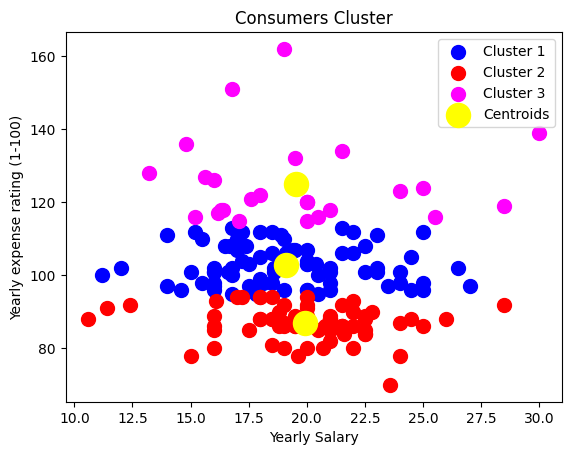

In [9]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'red', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'magenta', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Consumers Cluster')
plt.xlabel('Yearly Salary')
plt.ylabel('Yearly expense rating (1-100)')
plt.legend()

1. Konsumen dikelompokkan menjadi 3 cluster berdasarkan Yearly Salary (Gaji Tahunan) dan Yearly Expense Rating (Penilaian Pengeluaran Tahunan).
2. Cluster 1 (biru): Kelompok dengan pengeluaran rata-rata lebih tinggi pada tingkat gaji menengah.
3. Cluster 2 (merah): Kelompok dengan pengeluaran lebih rendah dan gaji relatif menengah.
4. Cluster 3 (ungu): Kelompok dengan pengeluaran tinggi meskipun tersebar pada berbagai tingkat gaji.
5. Centroid (kuning) menunjukkan pusat dari masing-masing cluster untuk representasi pola konsumen.

Gambar ini menunjukkan distribusi konsumen yang dapat dimanfaatkan untuk memahami segmentasi perilaku belanja dan pengeluaran.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [11]:
dataset = pd.read_csv('wine-clustering.csv')
dataset.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [12]:
X = dataset.iloc[:, [3, 4]].values

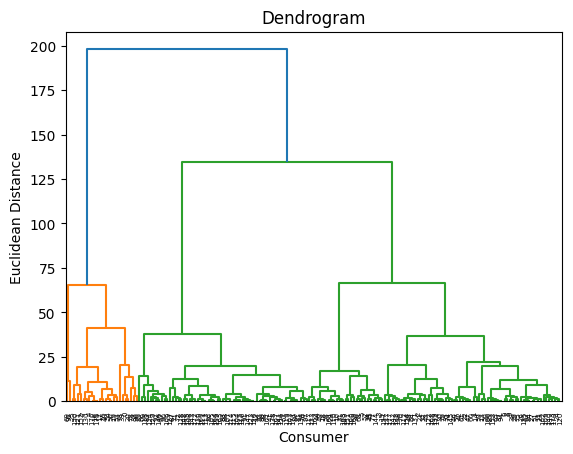

In [13]:
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Consumer')
plt.ylabel('Euclidean Distance')
plt.hlines(230, 0, 10000, color='red', linestyle = 'dotted')
plt.show()

Gambar dendrogram menunjukkan pengelompokan konsumen berdasarkan Euclidean Distance menggunakan metode Ward’s Linkage. Garis horizontal merah (threshold) di level 230 menunjukkan titik pemotongan dendrogram untuk menentukan jumlah cluster optimal. Berdasarkan dendrogram, konsumen dapat dikelompokkan menjadi 2 hingga 3 cluster, tergantung pada analisis lebih lanjut.

In [14]:
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)
y_hc

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       2, 2, 0, 1, 0, 2, 2, 1, 0, 0, 2, 0, 1, 0, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 1, 1, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 2, 1, 0,
       0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 1, 0, 1, 0,
       0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 2, 2, 0, 0, 1,
       1, 0], dtype=int64)

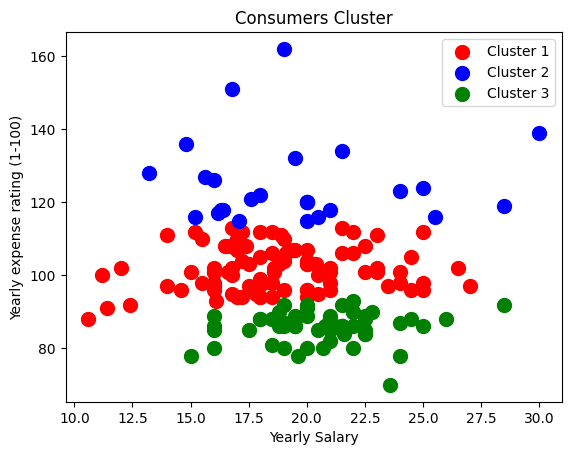

In [15]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.title('Consumers Cluster')
plt.xlabel('Yearly Salary')
plt.ylabel('Yearly expense rating (1-100)')
plt.legend()
plt.show()

Gambar menunjukkan konsumen dikelompokkan menjadi 3 cluster berdasarkan hubungan antara Yearly Salary (Gaji Tahunan) dan Yearly Expense Rating (Penilaian Pengeluaran Tahunan).

Cluster 1 (merah): Konsumen dengan pengeluaran dan gaji menengah.
Cluster 2 (biru): Konsumen dengan pengeluaran tinggi meskipun tersebar pada berbagai tingkat gaji.
Cluster 3 (hijau): Konsumen dengan pengeluaran rendah dan gaji menengah hingga tinggi.

Gambar ini mencerminkan segmentasi konsumen untuk analisis perilaku berdasarkan pengeluaran dan gaji.

In [16]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

- Mengimpor NumPy untuk komputasi numerik, seperti operasi array dan matriks.
- Mengimpor algoritma clustering DBSCAN (Density-Based Spatial Clustering of Applications with Noise).
- Mengimpor modul metrics dari scikit-learn untuk evaluasi model clustering.
- Mengimpor fungsi make_blobs untuk membuat dataset simulasi berupa kumpulan titik data (blobs).
- Mengimpor StandardScaler untuk menstandarkan fitur dataset agar memiliki mean 0 dan standar deviasi 1.
- Mengimpor Matplotlib untuk visualisasi data dalam bentuk grafik atau plot.

In [17]:
from sklearn.datasets import make_circles
import random

random.seed(4)

centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples = 555, centers = centers, cluster_std = 0.4, random_state = 0)
X = StandardScaler().fit_transform(X)

Kode akan menghasilkan dataset simulasi berupa kumpulan titik data yang dikelompokkan ke dalam 3 cluster dengan pusat pada koordinat yang ditentukan di variabel centers ([[1, 1], [-1, -1], [1, -1]]). Dataset ini terdiri dari 555 sampel dengan distribusi yang memiliki standar deviasi 0.4 di sekitar masing-masing pusat cluster. Selanjutnya, data tersebut distandarkan menggunakan StandardScaler agar memiliki mean 0 dan standar deviasi 1, sehingga lebih siap digunakan dalam eksperimen clustering untuk memastikan skala fitur tidak memengaruhi hasil algoritma.

## DBSCAN (Density-Based Spatial Clustering of Applications with Noise) 
Melakukan clustering dengan DBSCAN, mengidentifikasi jumlah cluster yang diestimasi, jumlah noise dalam data, dan mengevaluasi kualitas clustering dengan metrik completeness dan homogeneity seperti pada tahap di bawah ini:

## Bagian 1: Membuat Model DBSCAN dan Mendapatkan Label Cluster

In [18]:
db = DBSCAN(eps = 0.3, min_samples = 10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

## Bagian 2: Menghitung Jumlah Cluster

In [19]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print("Estimated number of clusters: %d" % n_clusters_)

Estimated number of clusters: 3


## Bagian 3: Menghitung Jumlah Noise Points

In [20]:
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of noise points: 20


## Bagian 4: Mengukur Completeness Score

In [21]:
print("completeness: %0.3f" % metrics.completeness_score(labels_true, labels))

completeness: 0.857


## Bagian 5: Mengukur Homogeneity Score

In [22]:
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))

Homogeneity: 0.946


# Visulisasi Hasil untuk Tampilan Blob

{0, 1, 2, -1}


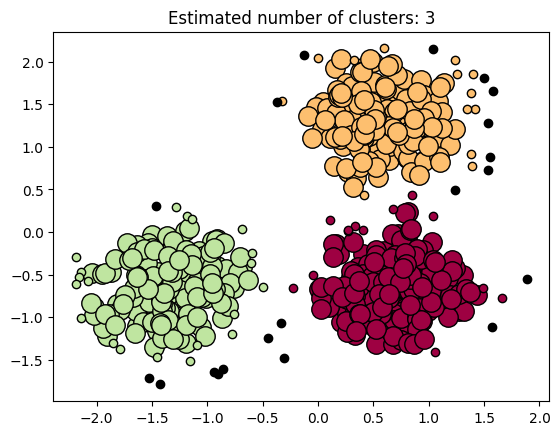

In [23]:
unique_labels = set(labels)
print(unique_labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]
    class_member_mask = (labels == k)
    
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14)
    
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)
    
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

- Visualisasi Cluster: Data dikelompokkan menjadi 3 cluster menggunakan algoritma DBSCAN, terlihat dengan warna yang berbeda (hijau, oranye, merah).
- Distribusi Data: Cluster memiliki distribusi yang padat dan terpisah secara jelas, menunjukkan bahwa DBSCAN berhasil mengelompokkan data yang berbentuk blob dengan baik.
- Titik Noise: Titik hitam adalah noise, yaitu data yang tidak termasuk dalam cluster mana pun karena tidak memenuhi kriteria kepadatan.

In [24]:
np.linspace(0, 1, len(unique_labels))

array([0.        , 0.33333333, 0.66666667, 1.        ])

In [25]:
colors

[(0.6196078431372549, 0.00392156862745098, 0.25882352941176473, 1.0),
 (0.9934640522875817, 0.7477124183006535, 0.4352941176470587, 1.0),
 (0.7477124183006538, 0.8980392156862746, 0.6274509803921569, 1.0),
 (0.3686274509803922, 0.30980392156862746, 0.6352941176470588, 1.0)]

## Melakukan Hal yang sama untuk visualisasi Non-linear (Lingkaran)

In [26]:
from sklearn.datasets import make_circles
import random

random.seed(4)
X, y = make_circles(n_samples=750, factor=0.3, noise=0.1)
X = StandardScaler().fit_transform(X)

In [27]:
db = DBSCAN(eps = 0.3, min_samples = 10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [28]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print("Estimated number of clusters: %d" % n_clusters_)

Estimated number of clusters: 3


In [29]:
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of noise points: 8


In [30]:
print("completeness: %0.3f" % metrics.completeness_score(y, labels))

completeness: 0.644


In [31]:
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))

Homogeneity: 1.000


# Visualisai Hasil untuk Bentuk Non-Linear (lingkaran)

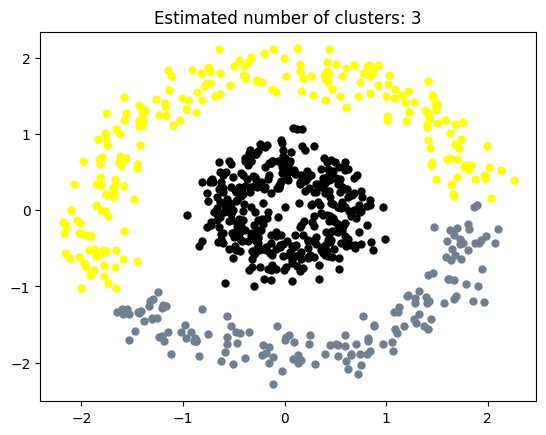

In [32]:
unique_labels = set(labels)
colors = ['yellow','slategrey','black']
for k, col in zip(unique_labels, colors):
    class_member_mask = (labels == k)
    
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor=[0,0,0,0], markersize=6)
    
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor=[0,0,0,0], markersize=6)
    
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

- Visualisasi Cluster: Data berbentuk melingkar dikelompokkan menjadi 3 cluster (kuning, hitam, abu-abu).
- Kemampuan Deteksi Pola Non-Linear: DBSCAN mampu menangkap pola berbentuk lingkaran yang tidak teratur, berbeda dari algoritma seperti K-Means yang sulit menangani bentuk ini.
- Titik Noise: Titik hitam di luar lingkaran utama adalah noise, menunjukkan ketangguhan algoritma dalam mendeteksi outliers.

# Kesimpulan

Kesimpulan untuk Kedua Gambar:
DBSCAN menunjukkan performa yang baik dalam mendeteksi cluster dengan bentuk non-linear (lingkaran) maupun bentuk reguler (blob). Algoritma ini efektif dalam menangani data dengan distribusi kepadatan yang berbeda dan mengenali noise, membuatnya sangat cocok untuk dataset kompleks dengan pola tidak beraturan.
